In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
print(data.shape)

(891, 12)


In [7]:
print('Survived : ', data.Survived.unique())
print('Pclass   : ', data.Pclass.unique())
print('Embarked : ', data.Embarked.dropna().unique())

Survived :  [0 1]
Pclass   :  [3 1 2]
Embarked :  ['S' 'C' 'Q']


In [8]:
# check for duplicate values
data.duplicated().sum()

0

In [9]:
# Check for null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
avg_age = data['Age'].mean()
data.Age.replace(np.nan, avg_age, inplace = True)

In [11]:
freq_port = data.Embarked.dropna().mode()[0]
data['Embarked'] = data['Embarked'].fillna(freq_port)

In [12]:
data.drop('Cabin', axis = 1, inplace = True)

In [13]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## EDA

<AxesSubplot:xlabel='Survived', ylabel='count'>

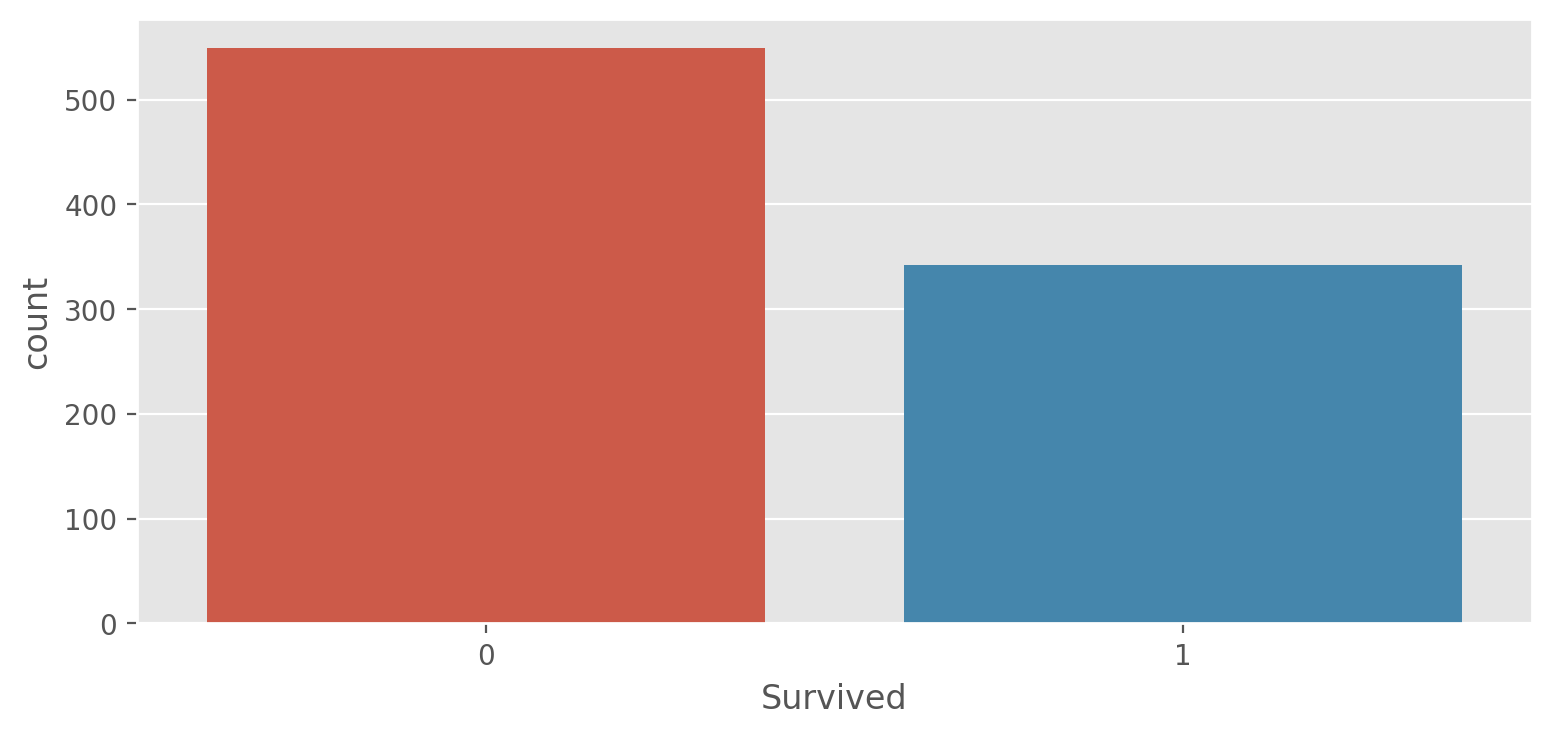

In [14]:
plt.figure(figsize = (9,4), dpi = 200)
sns.countplot(x = 'Survived', data = data)

In [15]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

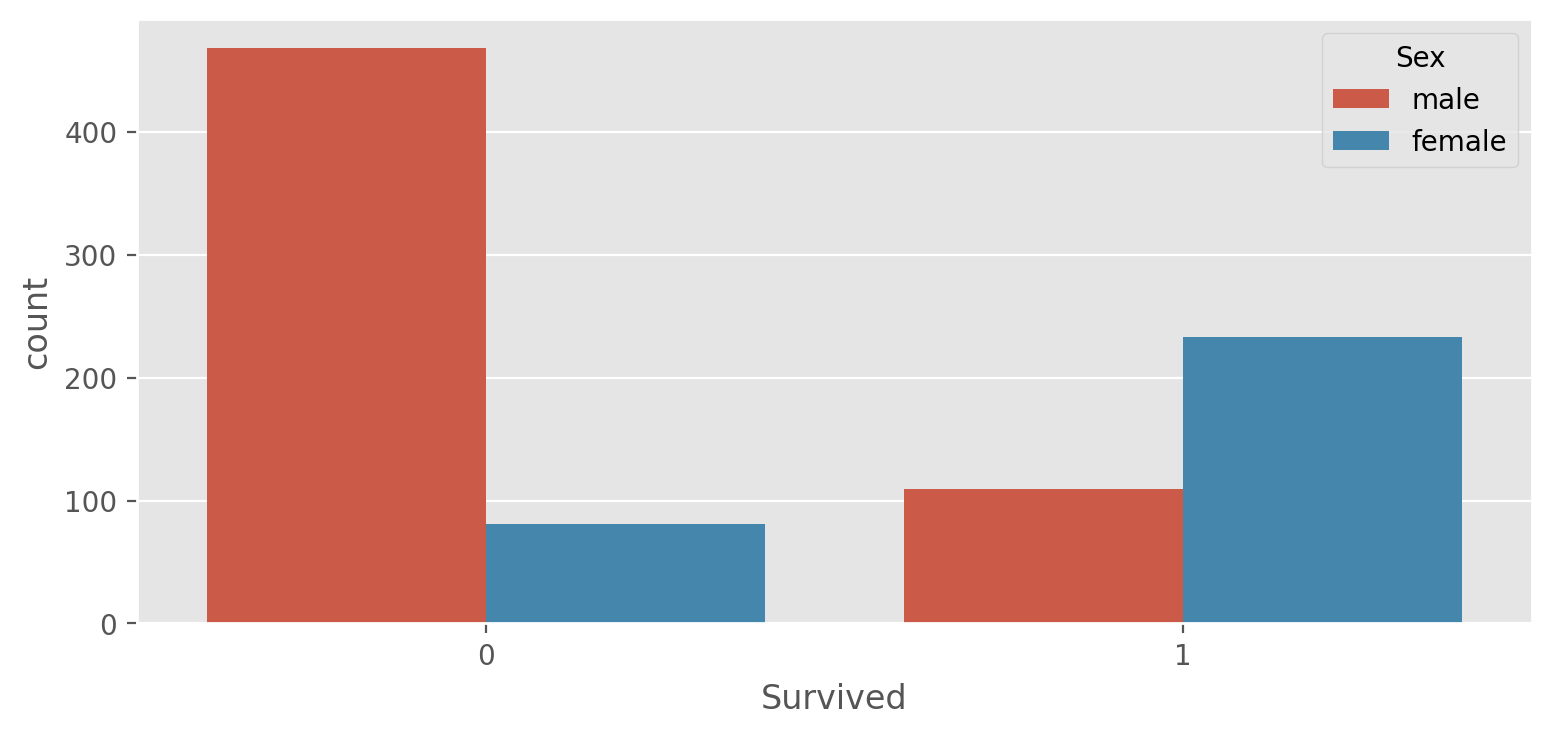

In [16]:
plt.figure(figsize = (9,4), dpi = 200)
sns.countplot('Survived', hue = 'Sex',data = data)

In [17]:
data.groupby('Sex')['Survived'].value_counts(normalize = True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

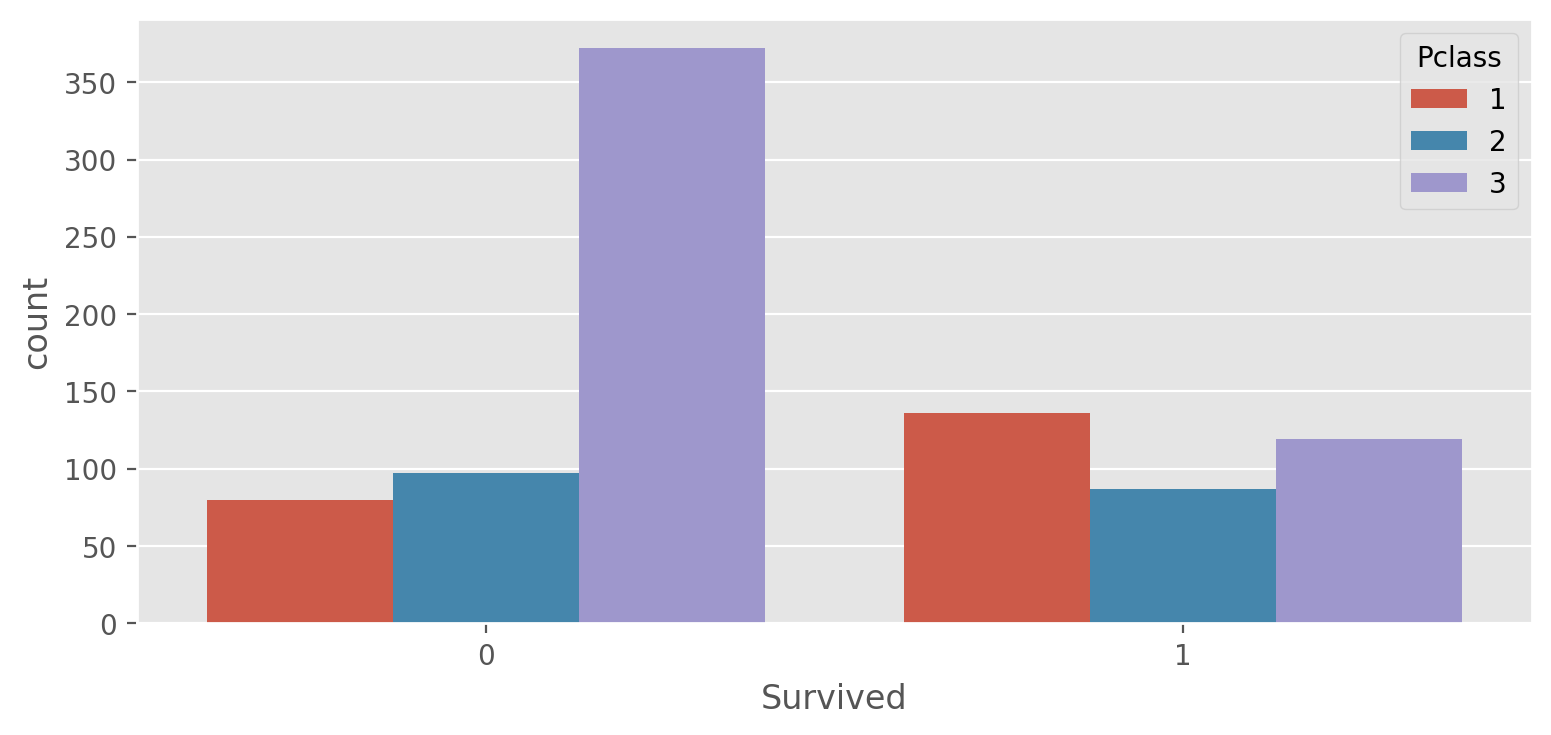

In [18]:
plt.figure(figsize = (9,4), dpi = 200)
sns.countplot(x = 'Survived', hue = 'Pclass', data = data)

In [19]:
data.groupby(['Pclass'])['Survived'].value_counts(normalize = True)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

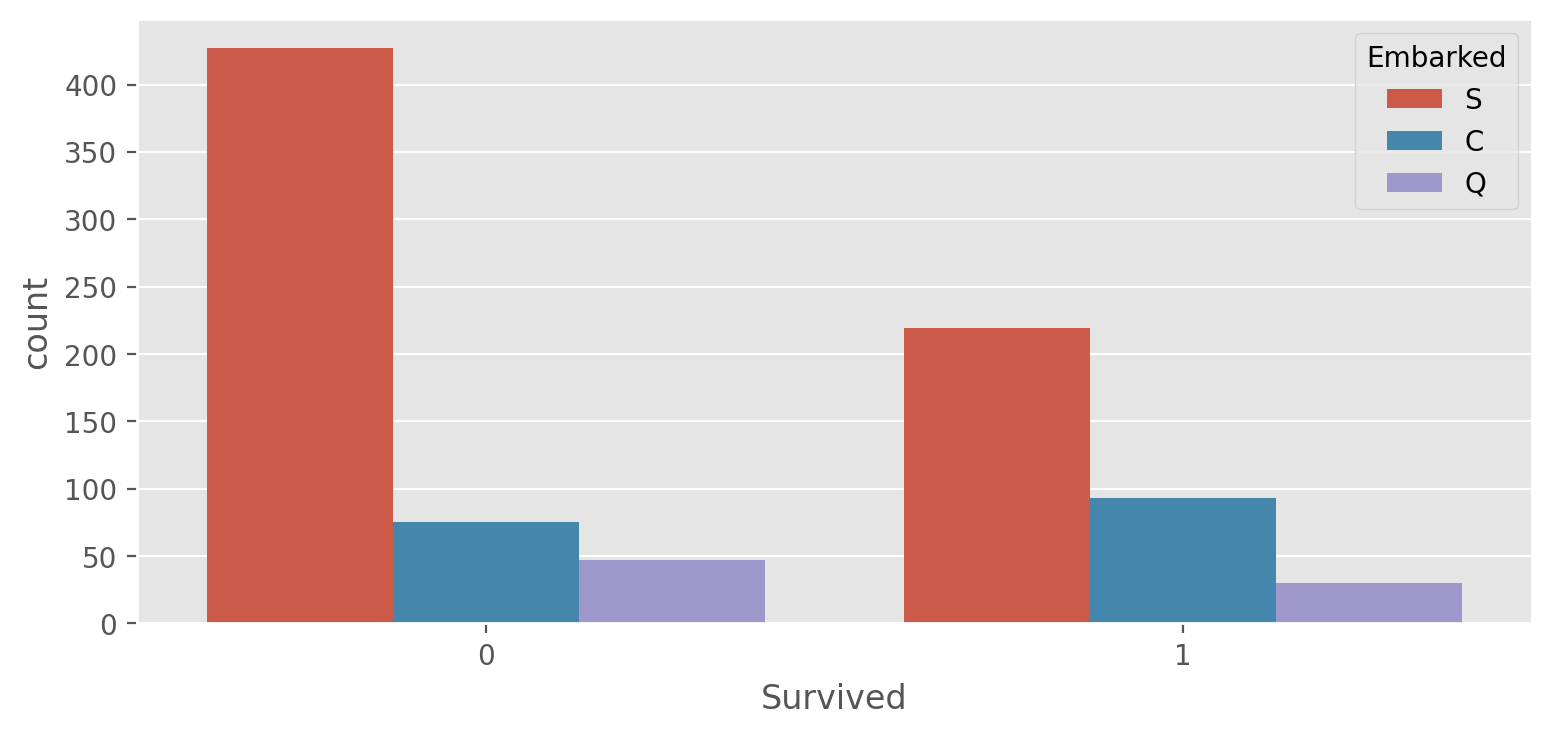

In [20]:
plt.figure(figsize = (9,4), dpi = 200)
sns.countplot(x = 'Survived', hue = 'Embarked', data = data)

In [21]:
data.groupby(['Embarked'])['Survived'].value_counts(normalize = True)

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.660991
          1           0.339009
Name: Survived, dtype: float64

<AxesSubplot:ylabel='Age'>

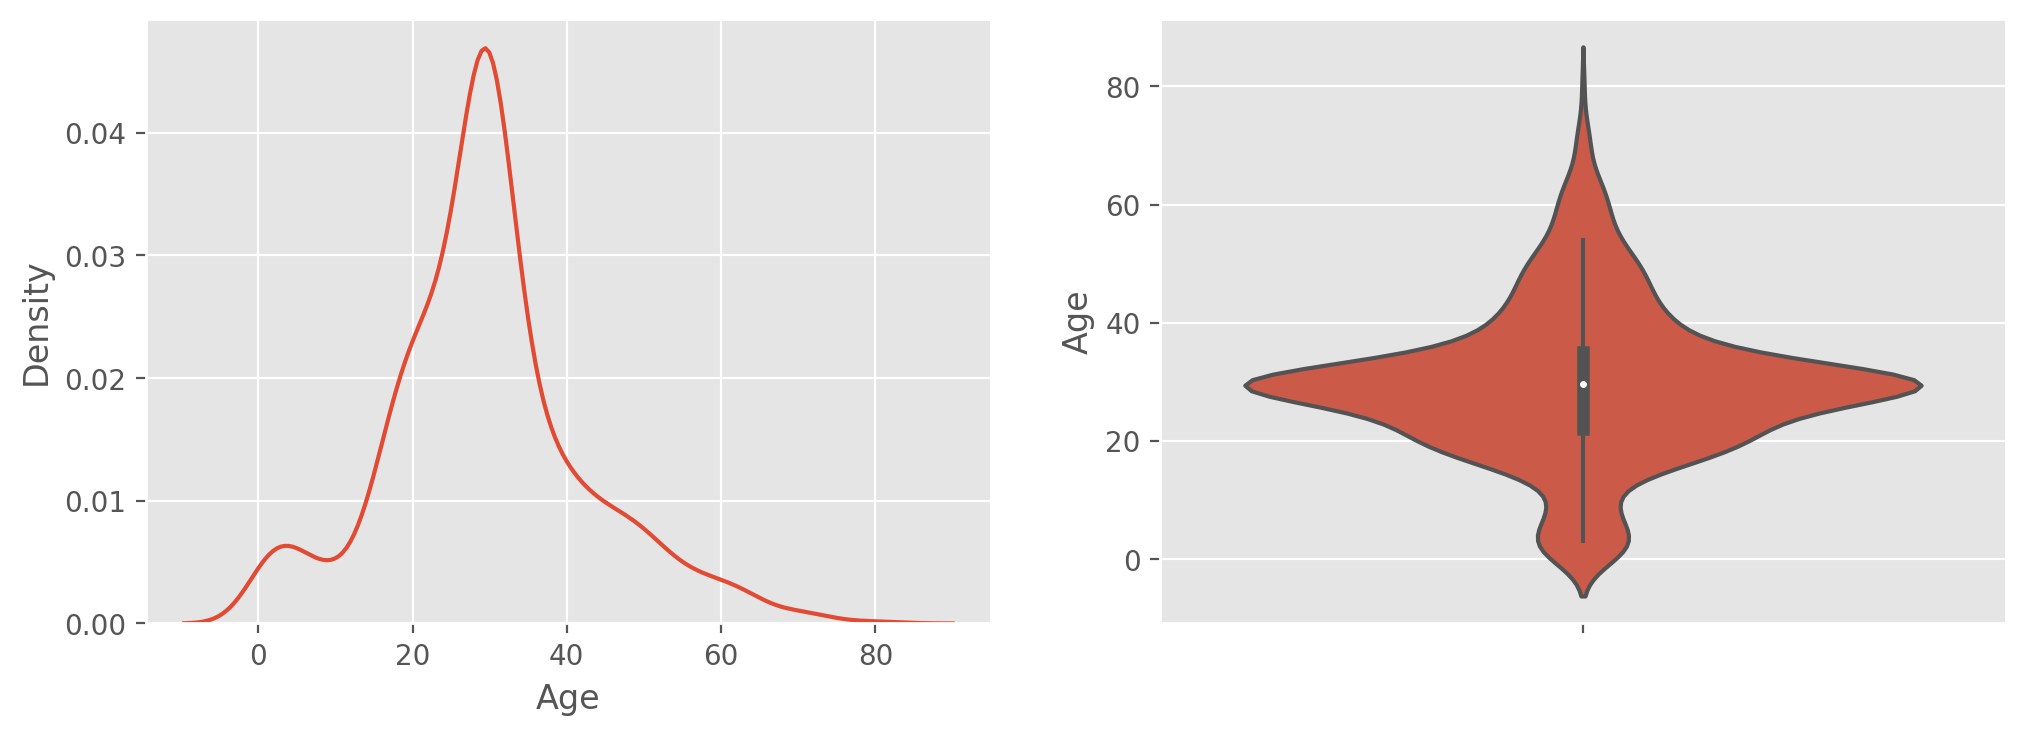

In [22]:
plt.figure(figsize = (12,4), dpi = 200)

plt.subplot(1,2,1)
sns.distplot(data['Age'], hist = False)

plt.subplot(1,2,2)
sns.violinplot( y = 'Age', data = data)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

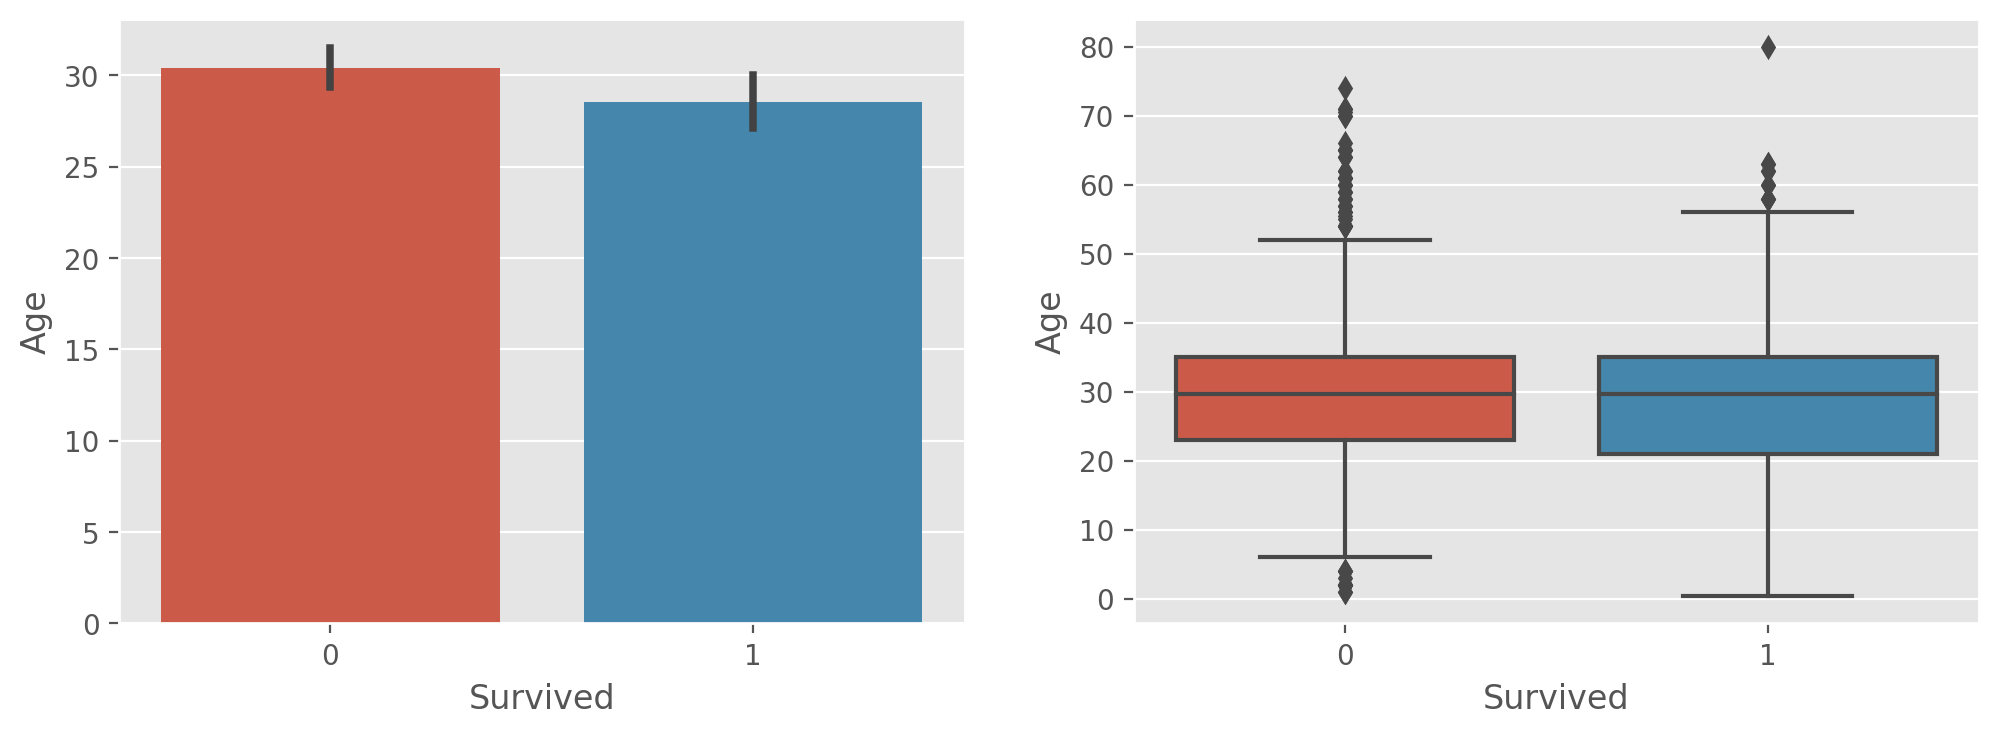

In [23]:
plt.figure(figsize = (12,4), dpi = 200)

plt.subplot(1,2,1)
sns.barplot(x = 'Survived', y = 'Age', data = data)

plt.subplot(1,2,2)
sns.boxplot(x = 'Survived', y = 'Age', data = data)

<AxesSubplot:ylabel='Fare'>

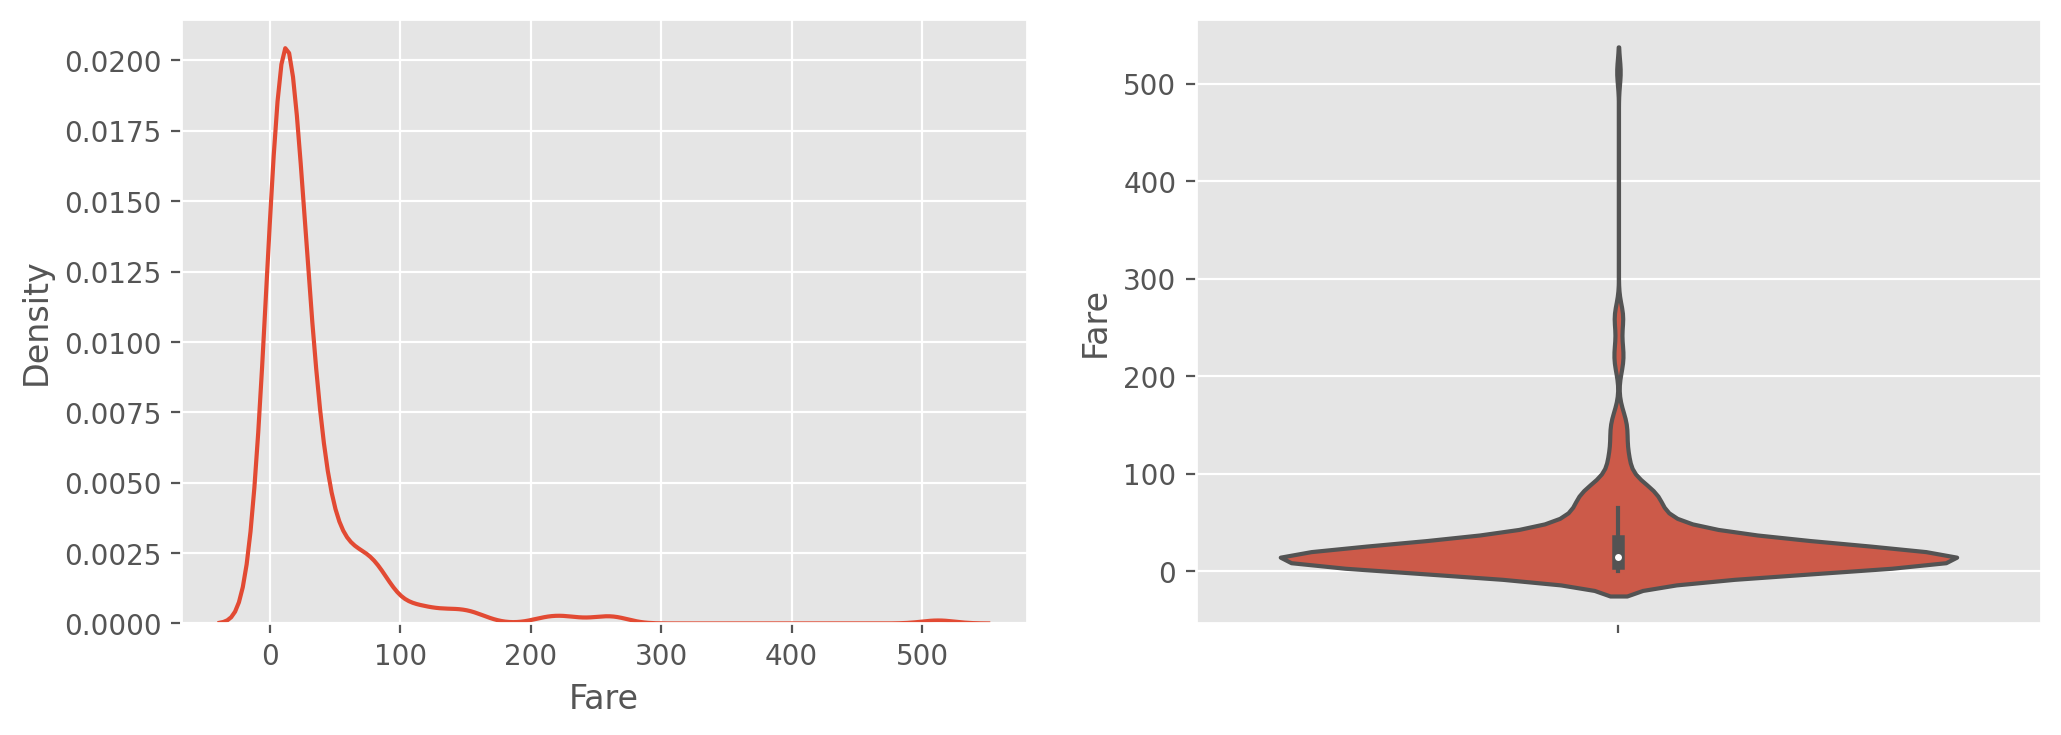

In [24]:
plt.figure(figsize = (12,4), dpi = 200)

plt.subplot(1,2,1)
sns.distplot(data['Fare'], hist = False)

plt.subplot(1,2,2)
sns.violinplot( y = 'Fare', data = data)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

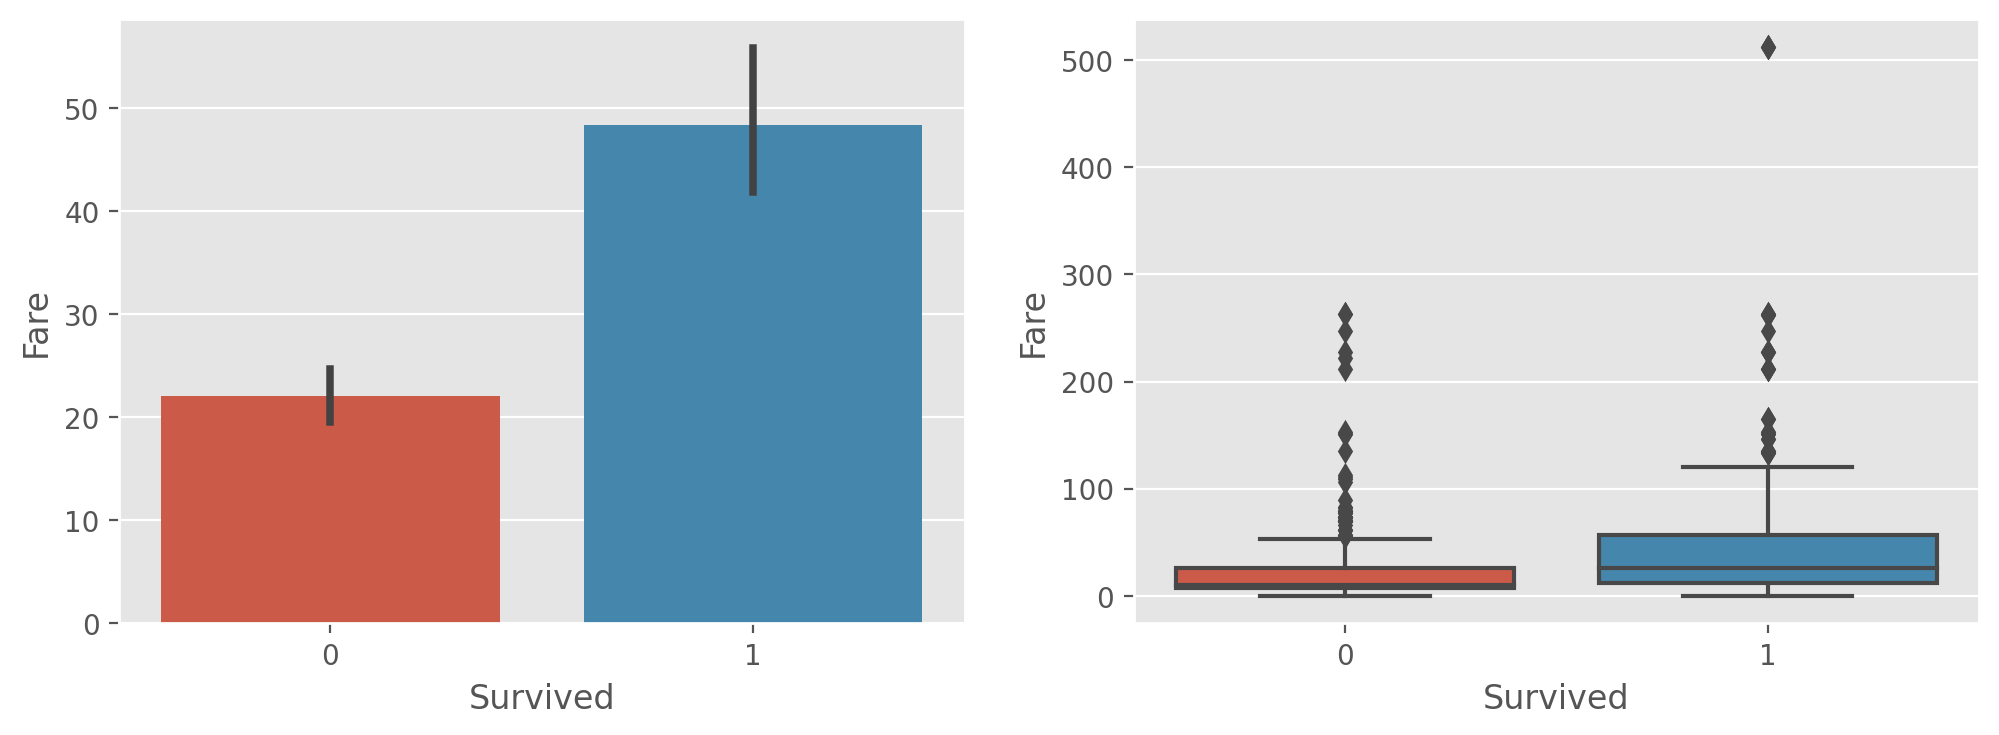

In [25]:
plt.figure(figsize = (12,4), dpi = 200)

plt.subplot(1,2,1)
sns.barplot(x = 'Survived', y = 'Fare', data = data)

plt.subplot(1,2,2)
sns.boxplot(x = 'Survived', y = 'Fare', data = data)

In [26]:
data[data.Fare > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


<AxesSubplot:xlabel='Survived', ylabel='count'>

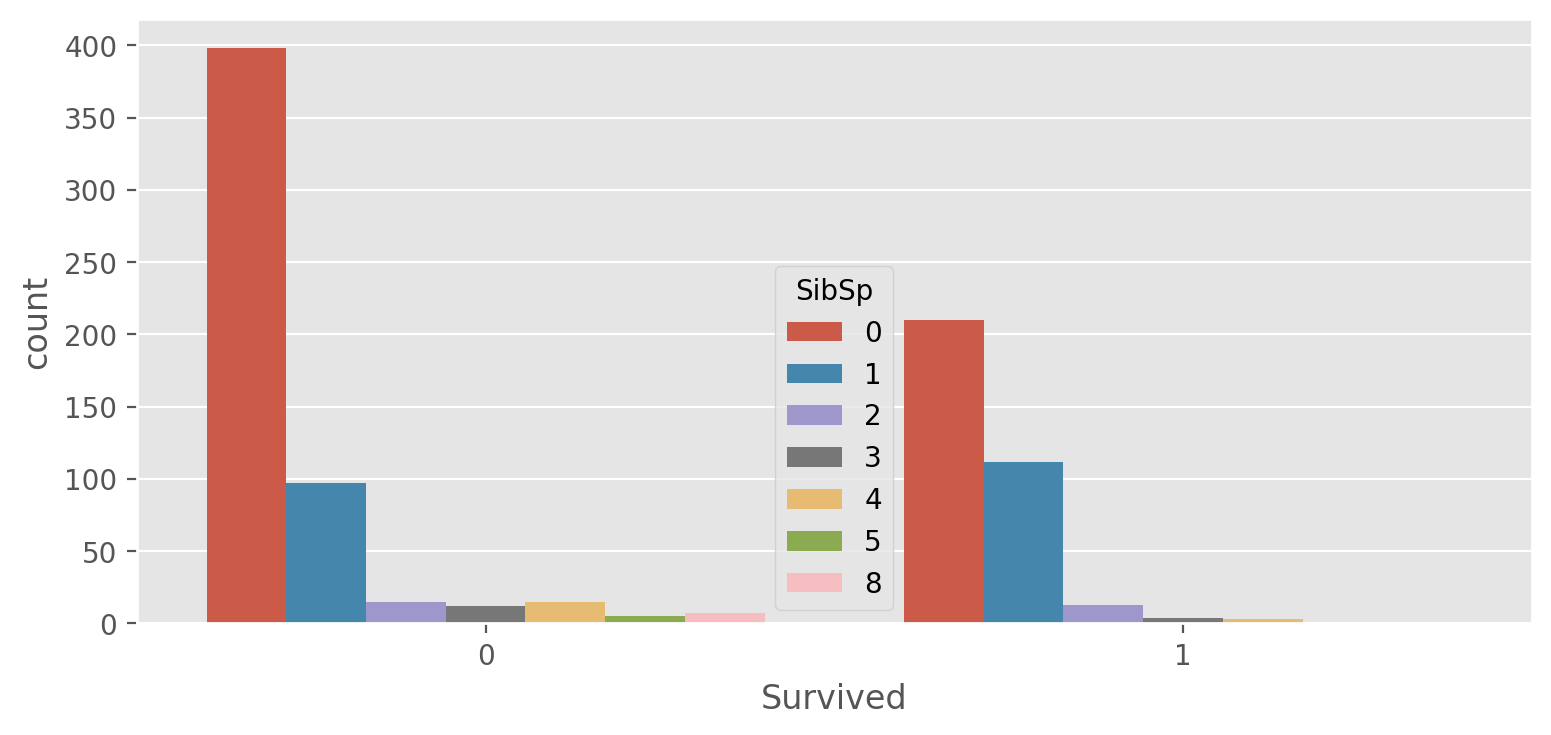

In [27]:
plt.figure(figsize = (9,4), dpi = 200)
sns.countplot(x = 'Survived', hue = 'SibSp', data = data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

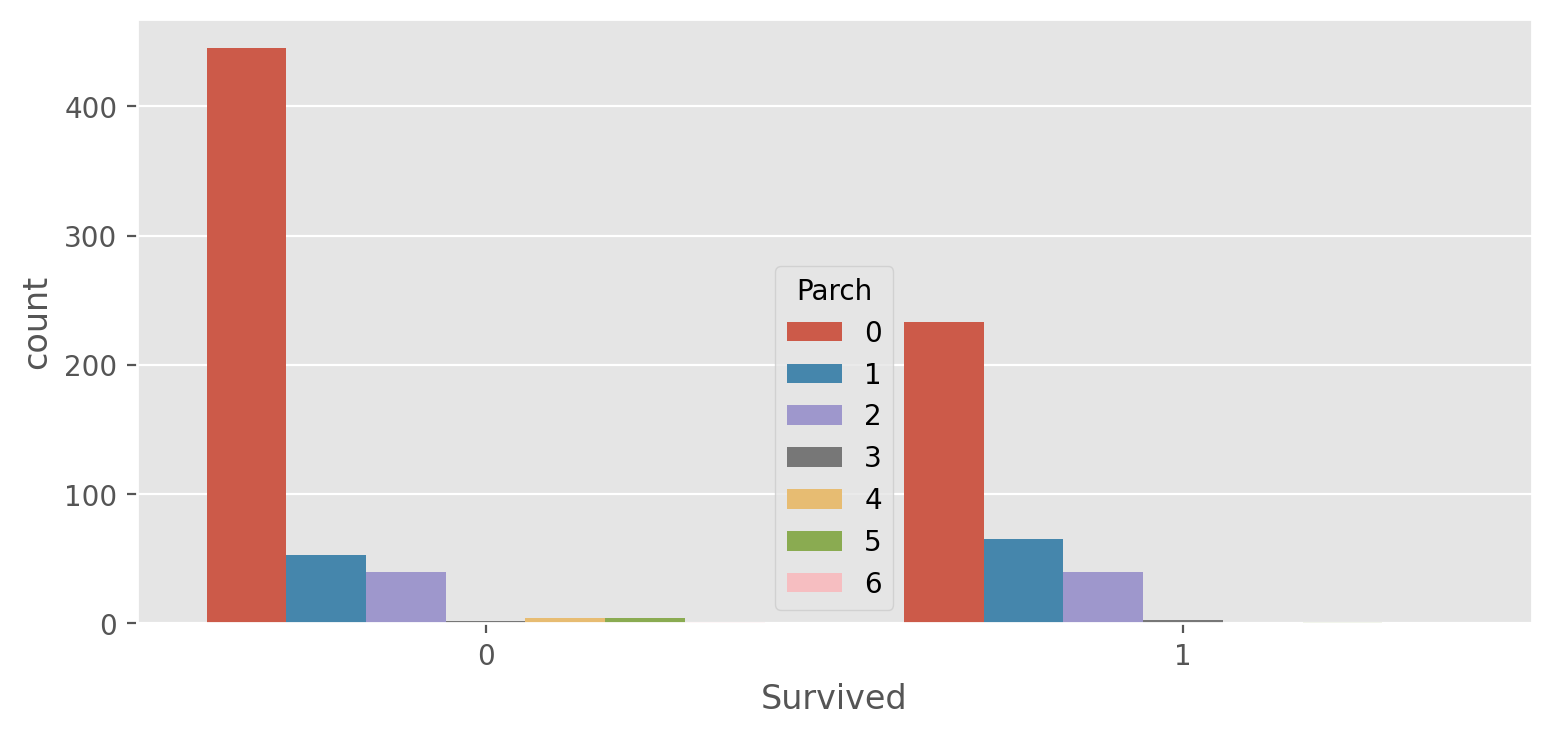

In [28]:
plt.figure(figsize = (9,4), dpi = 200)
sns.countplot(x = 'Survived', hue = 'Parch', data = data)

# -----------------------------------------------------------------------------------

In [29]:
data['Fam_members'] = data['SibSp'] + data['Parch']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fam_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [30]:
data.Sex = data.Sex.map({'female' : 1, 'male' : 0})
data.Embarked = data['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fam_members
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0


# ------------------------------------------------------------------------------------

In [31]:
cols = ['Sex', 'Pclass', 'Embarked', 'Fare', 'Age', 'Fam_members']

X = data[cols].values
Y = data[['Survived']].values

In [32]:
X[:5]

array([[ 0.    ,  3.    ,  0.    ,  7.25  , 22.    ,  1.    ],
       [ 1.    ,  1.    ,  1.    , 71.2833, 38.    ,  1.    ],
       [ 1.    ,  3.    ,  0.    ,  7.925 , 26.    ,  0.    ],
       [ 1.    ,  1.    ,  0.    , 53.1   , 35.    ,  1.    ],
       [ 0.    ,  3.    ,  0.    ,  8.05  , 35.    ,  0.    ]])

In [33]:
Y[:5]

array([[0],
       [1],
       [1],
       [1],
       [0]], dtype=int64)

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [35]:
print('Training Data Shape   : ', x_train.shape)
print('Training labels Shape : ', y_train.shape)
print('Testing Data shape    : ', x_test.shape)
print('Testing labels shape  : ', y_test.shape)

Training Data Shape   :  (712, 6)
Training labels Shape :  (712, 1)
Testing Data shape    :  (179, 6)
Testing labels shape  :  (179, 1)


In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [37]:
print('Training Set Accuracy : ', classifier.score(x_train, y_train))
print('Testing Set  Accuracy : ', classifier.score(x_test,  y_test))

Training Set Accuracy :  0.7991573033707865
Testing Set  Accuracy :  0.8156424581005587


In [38]:
classifier.predict(x_test[0:5])

array([0, 0, 0, 0, 0], dtype=int64)

# ===============================================
# Classification Evaluation Metrics

In [39]:
pred = classifier.predict(x_test)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, log_loss, classification_report

In [43]:
cm = confusion_matrix(y_test, pred)
cm

array([[99, 12],
       [21, 47]], dtype=int64)

In [42]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


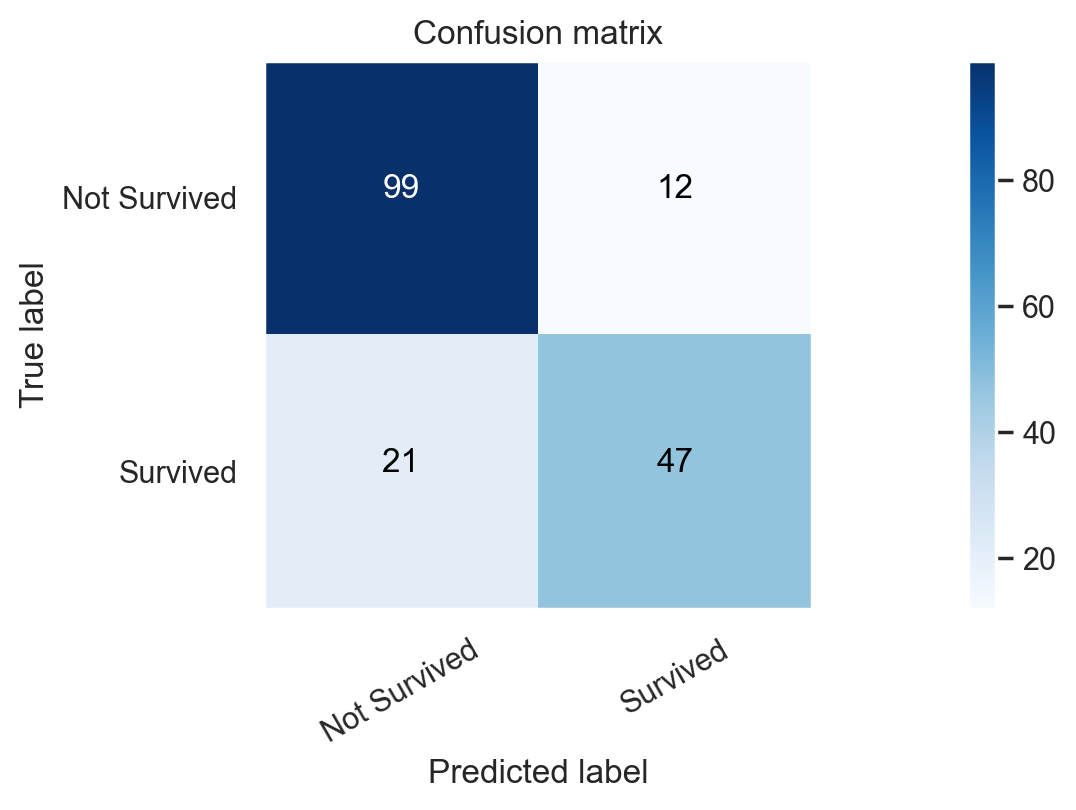

In [47]:
plt.figure(figsize = (16,4), dpi = 200)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, ['Not Survived', 'Survived'])

In [48]:
accuracy_score(y_test, pred)

0.8156424581005587

In [57]:
(99 + 47) / 179

0.8156424581005587

In [49]:
precision_score(y_test, pred)

0.7966101694915254

In [58]:
47 / (47 + 12)

0.7966101694915254

In [50]:
recall_score(y_test, pred)

0.6911764705882353

In [59]:
47 / (47 + 21)

0.6911764705882353

In [53]:
f1_score(y_test, pred)

0.7401574803149606

In [60]:
(2 * 0.7966 * 0.6912) / (0.7966 + 0.6912)

0.7401665815297754

In [54]:
log_loss(y_test, pred)

6.367537520677178

In [56]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       111
           1       0.80      0.69      0.74        68

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179

